# Module 02: A Box Model Carbon Assignment

### 1. Introduction

In the accompanying notebook [mod02-CarbonModel1.ipynb](./mod02-CarbonModel1.ipynb) and in class we developed a relatively simple model of global carbon balance that assumed that tracked carbon in the atmosphere and biosphere. The system of equations we developed to describe this system are shown below,

$$
\begin{align*}
\frac{dM_1}{dt} &= F_{21} - F_{12}\\
&= k_{21}M_2 - k_{12}M_1
\end{align*}
$$

and,

$$
\begin{align*}
\frac{dM_2}{dt} &= F_{12} - F_{21}\\
&= k_{12}M_1 - k_{21}M_2
\end{align*}
$$

where $M_1$ is the mass of carbon in the atmosphere (GtC), $M_2$ is the mass of carbon in the biosphere (GtC), $F_{12}$ is the flux of carbon from the atmosphere to the biosphere due to photosynthesis (GtC/yr), and $F_{21}$ is the flux of carbon from the biosphere to the atmosphere due to decay and respiration (GtC/yr).

In that notebook we develop a numerical model to describe that system, run it for given initial conditions and with no external inputs of carbon (we call this an "unforced" scenario) and compare it to the analytical solution. We observed that as the time step increased, we departed further from the analytical solution. 

In this assignment you will take your model one step more realistic by ensuring that the photosynthetic flux depends on both the amount of carbon in the atmosphere and in the biosphere. Then you will examine the impact of anthropogenic emissions from 1751-2008 on the biosphere and atmosphere, and how alternative future scenarios of emissions mitigation affect your system. 

The code cell below contains a couple of new commands and some file names that you will need in this assignment. You will need all of these commands, _but not necessarily

In [13]:
# Notebook Imports
import numpy as np
import matplotlib.pyplot as plt

## 2. Assignment Tasks

For all plots, label all axes and provide units.

__Problem A: Modify and rerun the model__

1. Modify the model so that the photosynthesis flux includes the mass of carbon in the land (i.e., $M_2$). Use the following parameters:

  * $M_1^0$ = 1100.0 
  * $M_2^0$ = 300.0 
  * $k_{12}$ = 0.0003 
  * $k_{21}$ = 0.1  

2. Repeat the "unforced" (i.e., no anthropogenic emissions) simulation above, but run the model for `t = 100` years with a daily time step (i.e., `dt = 1/365`)
3. Use the `print()` command to print out the value of $M_1$ and $M_2$ at the end of the simulation


## Problem A: Solution

We now look at adding photosynthesis into our model. We do this by modifying the model for the land-ocean to atmosphere. Instead of including just the mass of carbon in the atmosphere, we include the mass of carbon in the land-ocean system: $F_{12} = k_{12} M_1 M_2$. So the model we solve is given as follows:

$$\begin{align}
\frac{d M_1}{dt} &= F_{21} - F_{12} = k_{21} M_2 - k_{12} M_1 M_2 \\
\frac{d M_2}{dt} &= F_{12} - F_{21} = k_{12} M_1 M_2 - k_{21} M_2 \\
\end{align}$$

We solve this system in the cells below and output the final mass of carbon in the land-ocean and atmosphere:

In [14]:
# Variables
M1i = 1100.0	# Initial Atmospheric C Mass, [GtC]
M2i = 300.0		# Initial Land-Sea C Mass, [GtC]

k12 = 0.0003 	# Atmospheric Flux Constant, [1/years]
k21 = 0.1		# Land-Sea Flux Constant, [1/years]

ti = 0.0		# Initial Time, [years]
tf = 100.0		# Final Time, [years]
dt = 1/365		# Time Step, [years]

# Time domain
t = np.arange(ti, tf+dt, dt) 	# Time, [years]
Nt = t.shape[0] 				# Number of time steps

# Initialize model variables
M1 = np.zeros(Nt)
M2 = np.zeros(Nt)

# Begin time steps
for i in np.arange(Nt):
    if (i==0):
        # Initial time
        M1[i] = M1i
        M2[i] = M2i
        
    else:
        # RHS
        dM1dt = k21*M2[i-1] - k12*M1[i-1]*M2[i-1]
        dM2dt = k12*M1[i-1]*M2[i-1] - k21*M2[i-1]
        
        # Euler time step
        M1[i] = M1[i-1] + dM1dt*dt
        M2[i] = M2[i-1] + dM2dt*dt

# Output final results
M1_final = M1[-1]
M2_final = M2[-1]
print('After {} years:\n  M1 = {}\n  M2 = {}'.format(tf, M1_final, M2_final))

After 100.0 years:
  M1 = 333.3333333333658
  M2 = 1066.6666666665792


By rerunning the model with a significantly smaller atmospheric flux constant (the constant dictating how much carbon goes from the atmosphere to the land-ocean system), the amount of carbon in the land-ocean system decays much faster and that mass of carbon exists primarilly in the atmosphere.

__Problem B: Examine impacts of human emissions__

1. Load the anthropogenic emissions data for 1751-2008 (see numpy `np.loadtxt()` command usage [here](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html)). Note that the data is in a comma separated variable file (named `AnthropogenicEmissions.1751_2008.csv`) with one header row.
2. Plot the anthropogenic emissions data  
3. Starting from the initial conditions ($M_1^0$ and $M_2^0$) corresponding to the final conditions noted in part __A(3)__ above, simulate the response of the carbon system to the anthropogenic emissions from 1751 to 2008 by adding an appropriate source term in the system of equations. Create the following plots:

  * Mass of C in the atmosphere versus time 
  * Mass of C in the land versus time 
  * The change in mass of C in the atmosphere vs time 
  * The change in mass of C in the biosphere vs time 
    
4. Use the `print()` command to print out the value of $M_1$ and $M_2$ at the end of the simulation in 2008.

## Problem B: Solution

We start by loading the emissions data and visualize the data over time.

Text(0, 0.5, 'Anthropogenic Emissions [GtC]')

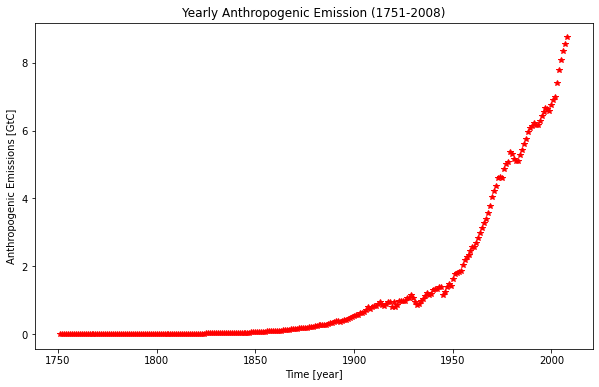

In [15]:
# Import data
anthropogenic_data_filename = 'AnthropogenicEmissions.1751_2008.csv'
data = np.loadtxt(anthropogenic_data_filename, delimiter=',', skiprows=1)

# Store data
year = data[:,0]
cflux = data[:,1]

# Visualize data
plt.figure(figsize=(10,6))
plt.title('Yearly Anthropogenic Emission ({}-{})'.format(int(year[0]), int(year[-1])))
plt.plot(year, cflux, 'r*')
plt.xlabel('Time [year]')
plt.ylabel('Anthropogenic Emissions [GtC]')

Anthropogenic emissions have significantly increased over time.

With the data successfully read in and looking good, let's rerun the model and include the anthropogenic emissions as a source flux entering the atmosphere:

$$\begin{align}
\frac{d M_1}{dt} &= F_{21} - F_{12} + F_{A}(t) = k_{21} M_2 - k_{12} M_1 M_2 + F_{A}(t) \\
\frac{d M_2}{dt} &= F_{12} - F_{21} = k_{12} M_1 M_2 - k_{21} M_2 \\
\end{align}$$

In [16]:
# Variables
M1i = M1_final	# Initial Atmospheric C Mass, [GtC]
M2i = M2_final	# Initial Land-Sea C Mass, [GtC]

k12 = 0.0003 	# Atmospheric Flux Constant, [1/years]
k21 = 0.1		# Land-Sea Flux Constant, [1/years]

# Time domain
ti = year[0]	                # Initial Time, [years]
tf = year[-1]	                # Final Time, [years]
dt = 1/365		                # Time Step, [years]
t = np.arange(ti, tf+dt, dt) 	# Time, [years]
Nt = t.shape[0] 				# Number of time steps

# Anthropogenic data (interpolated from data)
cflux_t = np.interp(t, year, cflux) # Interpolated Carbon Flux, [GtC/year]

# Initialize model variables
M1 = np.zeros(Nt)
M2 = np.zeros(Nt)

# Begin time steps
for i in np.arange(Nt):
    if (i==0):
        # Initial time
        M1[i] = M1i
        M2[i] = M2i
        
    else:
        # RHS
        dM1dt = k21*M2[i-1] - k12*M1[i-1]*M2[i-1] + cflux_t[i-1]
        dM2dt = k12*M1[i-1]*M2[i-1] - k21*M2[i-1]
        
        # Euler time step
        M1[i] = M1[i-1] + dM1dt*dt
        M2[i] = M2[i-1] + dM2dt*dt

M1_final = M1[-1]
M2_final = M2[-1]
print('Mass of Carbon in Systems at Time = {}:\n  Atmosphere = {}\n  Land-Ocean = {}'.format(t[-1], M1_final, M2_final))

Mass of Carbon in Systems at Time = 2007.9999999962602:
  Atmosphere = 353.22824788827904
  Land-Ocean = 1389.1417712620218


And now we visualize the data:

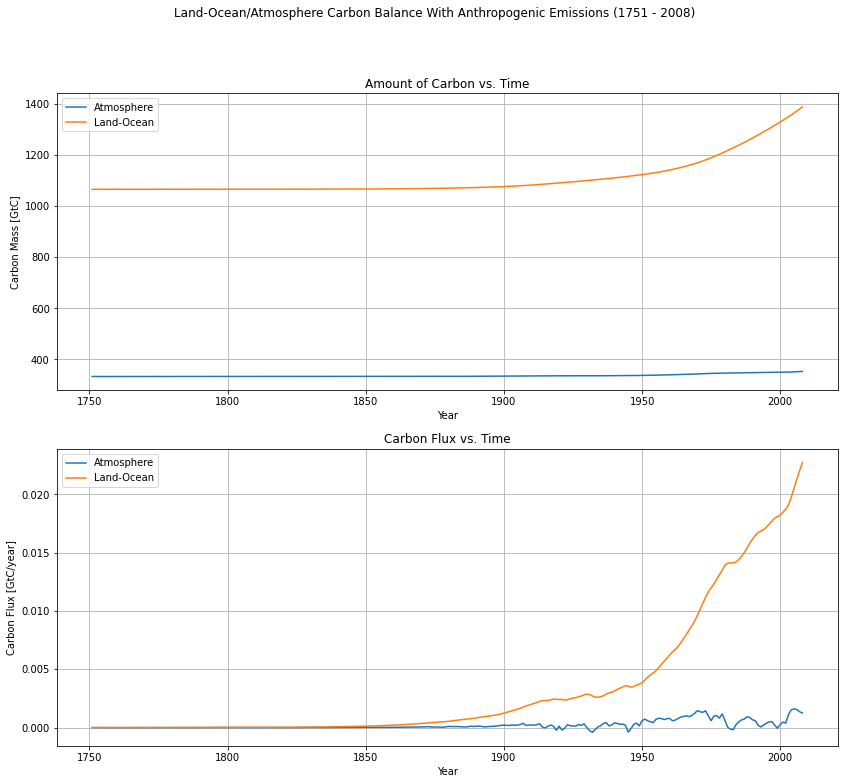

In [17]:
fig, axes = plt.subplots(2, 1, figsize=(14,12))
fig.suptitle('Land-Ocean/Atmosphere Carbon Balance With Anthropogenic Emissions ({} - {})'.format(int(year[0]), int(year[-1])))

axes[0].set_title('Amount of Carbon vs. Time')
axes[0].plot(t, M1, label='Atmosphere')
axes[0].plot(t, M2, label='Land-Ocean')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Carbon Mass [GtC]')
axes[0].legend()
axes[0].grid()

axes[1].set_title('Carbon Flux vs. Time')
axes[1].plot(t[1:], np.diff(M1), label='Atmosphere')
axes[1].plot(t[1:], np.diff(M2), label='Land-Ocean')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Carbon Flux [GtC/year]')
axes[1].legend()
axes[1].grid()


__Problem C: Examine the effects of mitigation__

1. Load the alternative emission scenarios contained in the file `.csv`, which represent three pathways to net zero emissions: (a) net zero emissions by the year 2030 (column 2), (c) net zero emissions by 2050 (column 3), and zero emissions growth (i.e., constant emissions) starting in 2008 (column 4).
2. Starting from the initial conditions ($M_1^0$ and $M_2^0$) corresponding to the final conditions noted in part __B(4)__ above, run the model three times, one for each scenario. Create the following plots: 

  * Mass of C in the atmosphere versus time (all three scenarios on one plot)
  * Mass of C in the land versus time (all three scenarios on one plot)
  * The change in mass of C in the atmosphere vs time 
  * The change in mass of C in the biosphere vs time 

## Problem C: Solution

Now let's explore the effects of mitigation. We start by loading and visualizing the future emissions data.

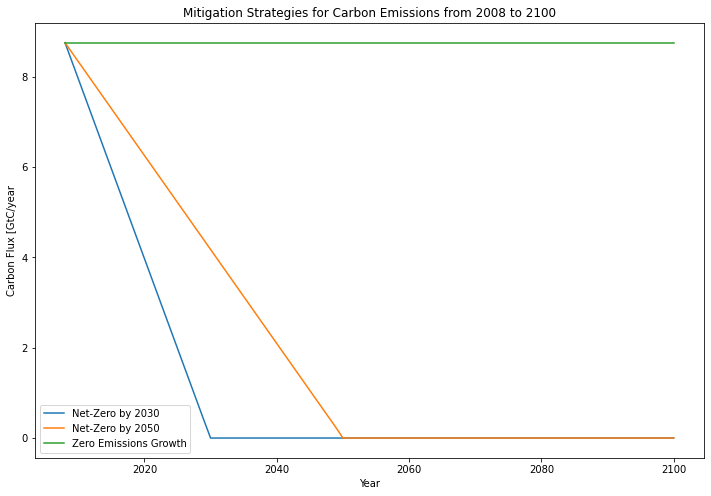

In [18]:
future_emissions_filename = 'EmissionsMitigationScenarios.2008_2100.csv'

data = np.loadtxt(future_emissions_filename, delimiter=',', skiprows=1)
year = data[:,0]
cflux_nz2030 = data[:,1]
cflux_nz2050 = data[:,2]
cflux_zeg = data[:,3]

# Time domain
ti = year[0]	                # Initial Time, [years]
tf = year[-1]	                # Final Time, [years]
dt = 1/365		                # Time Step, [years]
t = np.arange(ti, tf+dt, dt) 	# Time, [years]
Nt = t.shape[0] 				# Number of time steps

cflux_t_nz2030 = np.interp(t, year, cflux_nz2030) # Interpolated Carbon Flux, [GtC/year]
cflux_t_nz2050 = np.interp(t, year, cflux_nz2050) # Interpolated Carbon Flux, [GtC/year]
cflux_t_zeg = np.interp(t, year, cflux_zeg) # Interpolated Carbon Flux, [GtC/year]

plt.figure(figsize=(12,8))
plt.title('Mitigation Strategies for Carbon Emissions from {} to {}'.format(int(year[0]), int(year[-1])))
plt.plot(year, cflux_nz2030, label='Net-Zero by 2030')
plt.plot(year, cflux_nz2050, label='Net-Zero by 2050')
plt.plot(year, cflux_zeg, label='Zero Emissions Growth')
plt.xlabel('Year')
plt.ylabel('Carbon Flux [GtC/year')
plt.legend()

And running the model from 2008 until 2100 with our supplied emissions mitigation. We use the mitigation values as the anthropogenic flux source $F_A$.

In [19]:
# Variables
M1i = M1_final	# Initial Atmospheric C Mass, [GtC]
M2i = M2_final	# Initial Land-Sea C Mass, [GtC]

k12 = 0.0003 	# Atmospheric Flux Constant, [1/years]
k21 = 0.1		# Land-Sea Flux Constant, [1/years]

# Time domain
ti = year[0]	                # Initial Time, [years]
tf = year[-1]	                # Final Time, [years]
dt = 1/365		                # Time Step, [years]
t = np.arange(ti, tf+dt, dt) 	# Time, [years]
Nt = t.shape[0] 				# Number of time steps

# Create instances for each scenario
N_scenarios = 3
M1_scenarios = [
    np.zeros(Nt),
    np.zeros(Nt),
    np.zeros(Nt)
]
M2_scenarios = [
    np.zeros(Nt),
    np.zeros(Nt),
    np.zeros(Nt)
]
cflux_t_scenarios = [
    cflux_t_nz2030,
    cflux_t_nz2050,
    cflux_t_zeg
]

# Begin time steps
for s in range(N_scenarios):
    for i in np.arange(Nt):
        if (i==0):
            # Initial time
            M1_scenarios[s][i] = M1i
            M2_scenarios[s][i] = M2i
            
        else:
            # RHS
            dM1dt = k21*M2_scenarios[s][i-1] - k12*M1_scenarios[s][i-1]*M2_scenarios[s][i-1] + cflux_t_scenarios[s][i-1]
            dM2dt = k12*M1_scenarios[s][i-1]*M2_scenarios[s][i-1] - k21*M2_scenarios[s][i-1]
            
            # Euler time step
            M1_scenarios[s][i] = M1_scenarios[s][i-1] + dM1dt*dt
            M2_scenarios[s][i] = M2_scenarios[s][i-1] + dM2dt*dt

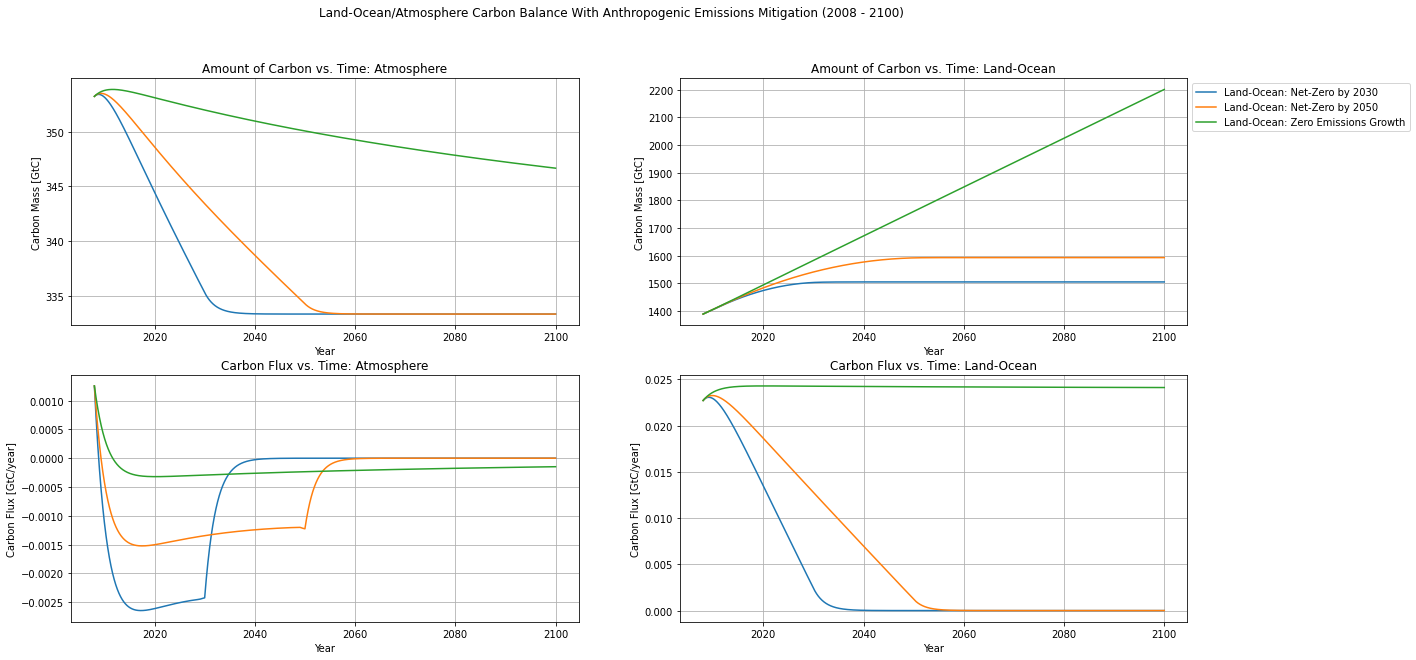

In [20]:
labels = [
	'Net-Zero by 2030',
	'Net-Zero by 2050',
	'Zero Emissions Growth'
]

fig, axes = plt.subplots(2, 2, figsize=(20,10))
fig.suptitle('Land-Ocean/Atmosphere Carbon Balance With Anthropogenic Emissions Mitigation ({} - {})'.format(int(year[0]), int(year[-1])))

axes[0,0].set_title('Amount of Carbon vs. Time: Atmosphere')
for s in range(N_scenarios):
	axes[0,0].plot(t, M1_scenarios[s], label='Atmosphere: {}'.format(labels[s]))
axes[0,0].set_xlabel('Year')
axes[0,0].set_ylabel('Carbon Mass [GtC]')
# axes[0,0].legend()
axes[0,0].grid()

axes[0,1].set_title('Amount of Carbon vs. Time: Land-Ocean')
for s in range(N_scenarios):
	axes[0,1].plot(t, M2_scenarios[s], label='Land-Ocean: {}'.format(labels[s]))
axes[0,1].set_xlabel('Year')
axes[0,1].set_ylabel('Carbon Mass [GtC]')
axes[0,1].legend(bbox_to_anchor=(1,1))
axes[0,1].grid()

axes[1,0].set_title('Carbon Flux vs. Time: Atmosphere')
for s in range(N_scenarios):
	axes[1,0].plot(t[1:], np.diff(M1_scenarios[s]), label='Atmosphere: {}'.format(labels[s]))
axes[1,0].set_xlabel('Year')
axes[1,0].set_ylabel('Carbon Flux [GtC/year]')
# axes[1,0].legend()
axes[1,0].grid()

axes[1,1].set_title('Carbon Flux vs. Time: Land-Ocean')
for s in range(N_scenarios):
	axes[1,1].plot(t[1:], np.diff(M2_scenarios[s]), label='Land-Ocean: {}'.format(labels[s]))
axes[1,1].set_xlabel('Year')
axes[1,1].set_ylabel('Carbon Flux [GtC/year]')
# axes[1,1].legend()
axes[1,1].grid()